## Machine leaning project
This project is about wine reviews dataset that was found in Kaggle.

Project team members: Annely Liivas, Velda Lauringson, Eduard Rudi

In [1]:
import pandas as pd
import gensim
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import nltk
import re

In [3]:
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.corpus import stopwords

In [4]:
data_loc = 'data/'

In [5]:
data1 = pd.read_csv(data_loc + 'winemag-data_first150k.csv', index_col=0)
data2 = pd.read_csv(data_loc + 'winemag-data-130k-v2.csv', index_col=0)

In [6]:
#Panen andmed kokku
dataset = pd.concat([data1,data2])

In [7]:
# Reset index
dataset.reset_index(drop=True)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280896,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
280897,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Pinot Noir,Citation,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon)
280898,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Gewürztraminer,Domaine Gresser,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...
280899,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Pinot Gris,Domaine Marcel Deiss,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace)


In [8]:
#Vaatan, mis toimub
dataset.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN


In [9]:
len(dataset)

280901

In [29]:
# dataset.taster_name.isna().sum()
for column in dataset.columns:
    print(f'Column {column} has {dataset[column].isna().sum()} NaN values')

Column country has 68 NaN values
Column description has 0 NaN values
Column designation has 83200 NaN values
Column points has 0 NaN values
Column price has 22691 NaN values
Column province has 68 NaN values
Column region_1 has 46307 NaN values
Column region_2 has 169437 NaN values
Column variety has 1 NaN values
Column winery has 0 NaN values
Column taster_name has 177174 NaN values
Column taster_twitter_handle has 182143 NaN values
Column title has 150930 NaN values


In [30]:
dataset = dataset.loc[dataset.country.notna()]

In [31]:
# dataset.taster_name.isna().sum()
for column in dataset.columns:
    print(f'Column {column} has {dataset[column].isna().sum()} NaN values')

Column country has 0 NaN values
Column description has 0 NaN values
Column designation has 83189 NaN values
Column points has 0 NaN values
Column price has 22687 NaN values
Column province has 0 NaN values
Column region_1 has 46239 NaN values
Column region_2 has 169369 NaN values
Column variety has 1 NaN values
Column winery has 0 NaN values
Column taster_name has 177169 NaN values
Column taster_twitter_handle has 182138 NaN values
Column title has 150925 NaN values


In [11]:
taster_df = dataset.loc[dataset.taster_name.notna()]
len(taster_df)

103727

In [12]:
tasters = taster_df.taster_name.unique()
tasters

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

In [18]:
taster_df['points'].loc[taster_df.taster_name == tasters[0]].mean()

88.86794729027469

In [20]:
tasters_avg_score = {}
for taster in tasters:
    # print(taster)
    tasters_avg_score[taster] = taster_df['points'].loc[taster_df.taster_name == taster].mean()
tasters_avg_score

{'Kerin O’Keefe': 88.86794729027469,
 'Roger Voss': 88.70800344908677,
 'Paul Gregutt': 89.08256399496433,
 'Alexander Peartree': 85.855421686747,
 'Michael Schachner': 86.90749306197965,
 'Anna Lee C. Iijima': 88.41562853907135,
 'Virginie Boone': 89.21337946943483,
 'Matt Kettmann': 90.00868603916614,
 'Sean P. Sullivan': 88.75573902537253,
 'Jim Gordon': 88.62628680871438,
 'Joe Czerwinski': 88.53623469982514,
 'Anne Krebiehl\xa0MW': 90.56255088195387,
 'Lauren Buzzeo': 87.73950953678474,
 'Mike DeSimone': 89.1011673151751,
 'Jeff Jenssen': 88.31975560081466,
 'Susan Kostrzewa': 86.60921658986175,
 'Carrie Dykes': 86.39568345323741,
 'Fiona Adams': 86.88888888888889,
 'Christina Pickard': 87.83333333333333}

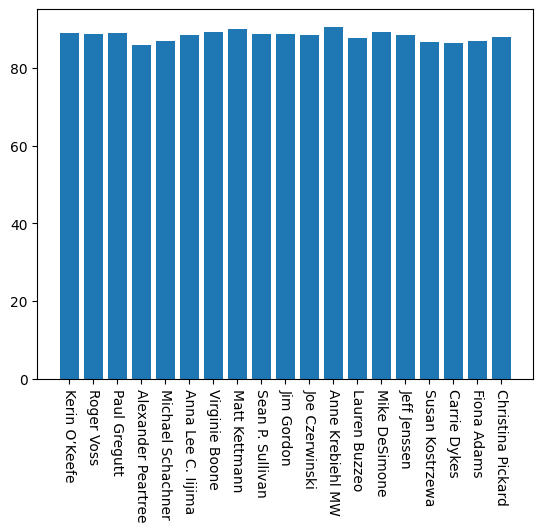

In [25]:
plt.bar(tasters_avg_score.keys(), tasters_avg_score.values())
plt.xticks(rotation=-90)
plt.show()

In [26]:
tasters_avg_price = {}
for taster in tasters:
    # print(taster)
    tasters_avg_price[taster] = taster_df['price'].loc[taster_df.taster_name == taster].mean()
tasters_avg_price

{'Kerin O’Keefe': 41.95341300384849,
 'Roger Voss': 38.64996034106682,
 'Paul Gregutt': 33.644872604758895,
 'Alexander Peartree': 29.053268765133172,
 'Michael Schachner': 25.23115510668183,
 'Anna Lee C. Iijima': 29.79011215381094,
 'Virginie Boone': 46.621962764278955,
 'Matt Kettmann': 38.64213564213564,
 'Sean P. Sullivan': 34.085888324873096,
 'Jim Gordon': 26.935507072644448,
 'Joe Czerwinski': 35.1755786113328,
 'Anne Krebiehl\xa0MW': 31.230135373749263,
 'Lauren Buzzeo': 24.492702860478694,
 'Mike DeSimone': 28.16468253968254,
 'Jeff Jenssen': 22.234215885947048,
 'Susan Kostrzewa': 22.908667287977632,
 'Carrie Dykes': 30.753623188405797,
 'Fiona Adams': 31.14814814814815,
 'Christina Pickard': 29.333333333333332}

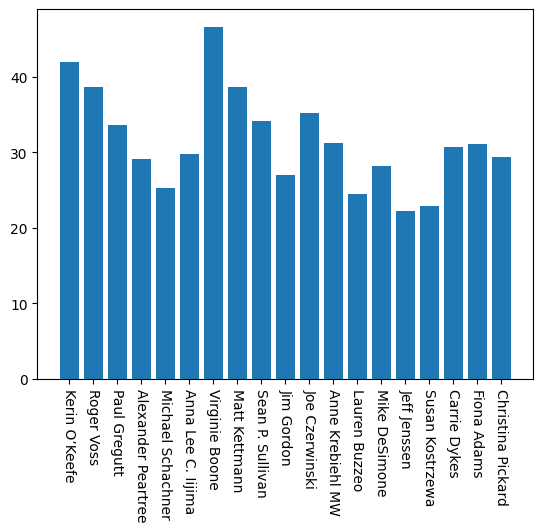

In [27]:
plt.bar(tasters_avg_price.keys(), tasters_avg_price.values())
plt.xticks(rotation=-90)
plt.show()